###  UCI 저장소에서 제공하는 피마인디언 데이타

- 1950년대까지 비만인이 없던 피마인디언 부족

- 그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다


- 샘플수(레코드) : 768
- 속성 : 8
        - 정보1 (pregnant) : 과거 임신 횟수
        - 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg)
        - 정보3 (pressure) : 혈압(mm Hg)
        - 정보4 (thickness) :삼두근 피부 주름 두께(mm)
        - 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml)
        - 정보6 (BMI) : 체질량지수  weight(kg)/(height(m)*height(m))
        - 정보7 (pedigree) : 당뇨병 가족력
        - 정보8 (age) : 나이
        
- 클래스 : 당뇨 (1:당뇨 / 0:당뇨아님)      

In [2]:
# (1) 데이타셋 로딩
#      pima-indians-diabetes.csv 파일을 데이타프레임으로 로딩하면서 컬럼명도 지정

import pandas as pd

df = pd.read_csv('./dataset/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness',
                                                               'insulin','BMI','pedigree','age','diabetes'])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# (2) 정보 확인

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
diabetes     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


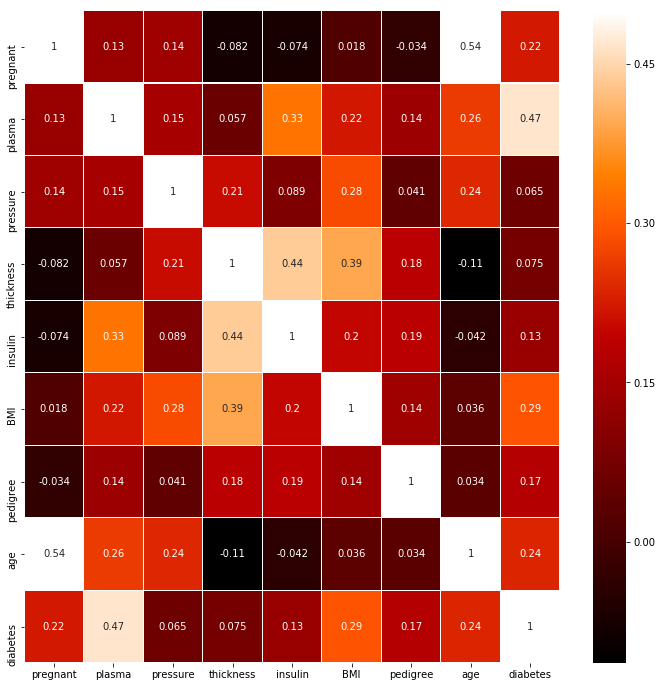

'\nheatmap : 두 항목씩 짝으로 어떤 패턴으로 변화하는지 관할하는 함수\n    \n'

In [7]:
# (3) 그래프를 이용하여 상관관계 등 알아보기

import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 크기를 결정
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

'''
heatmap : 두 항목씩 짝으로 어떤 패턴으로 변화하는지 관할하는 함수
    두 항목이 전혀 다른 패턴으로 변화하고 있으면 0
    두 항목이 비슷한 패턴으로 변할수록 1에 가깝다
    
    df.corr() : 상관계수????
    
    vmax : 색상의 밝기
    camp : 미리 정해진 matplotlib 색상의 설정값
            https://matplotlib.org/users/colormaps.html 에서 확인
'''

[ 그래프 분석 ]

클래스인 diabetes와 plasma 속성이 상관관계가 높다

즉, 이 속성이 결론을 만드는 중요한 역할을 한다고 할 수 있다

##  [과제] 상관있는 속성들을 추출하고 분석하여 인사이트를 도출할 수 있는 시각화하기

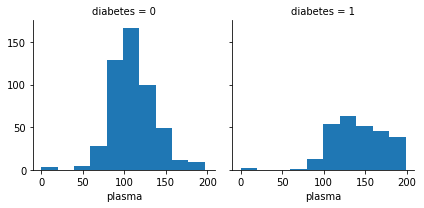

In [8]:
# diabetes와 plasma 두 항목을 다시 확인하고자

grid = sns.FacetGrid(df, col='diabetes')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

[ 분석]

plasma 항목의 수치가 100이상이면 당뇨병 환자인 경우가 많다